# Read Data
First, we read the csv file as a Pnadas dataframe. The dataset is available on Kaggle [Link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [775]:
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/basmaashour/Desktop/healthcare-dataset-stroke-data.csv") 
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis
- We have 5110 samples and 12 dimensions. The coulmn id can be removed as we don't need, and the coulm stroke is our label, so 10 coulmns in total

In [776]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Plotting correlation and distribution
- bmi and avg_glucose_level are tail heavy distribtuions while age approximates to a Gassian distribution

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


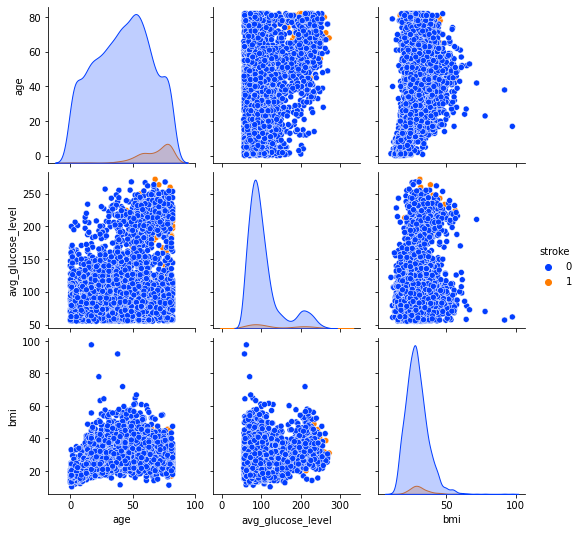

In [777]:
import seaborn as sns
sns.pairplot(x_vars=num_cols, y_vars=num_cols, hue='stroke', data=data, palette='bright')
data[num_cols].corr()

### Plot individual histograms for all the numeric feature columns.



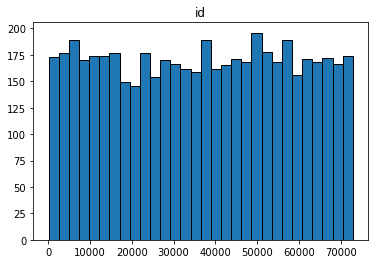

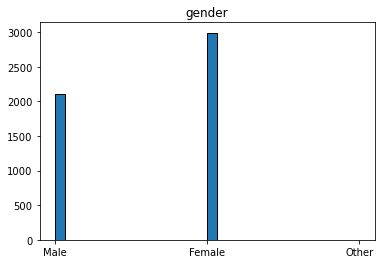

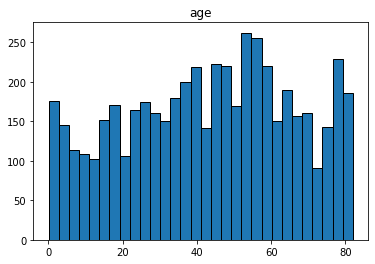

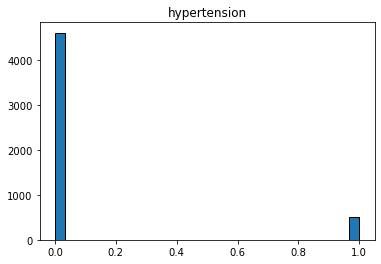

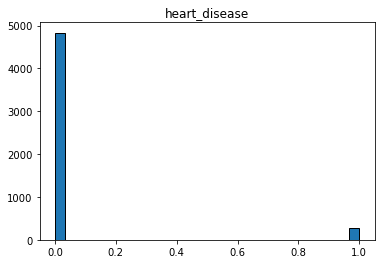

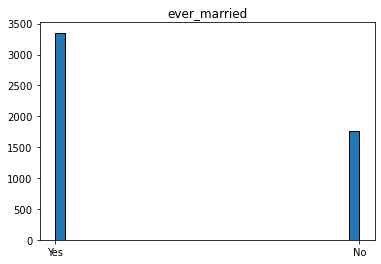

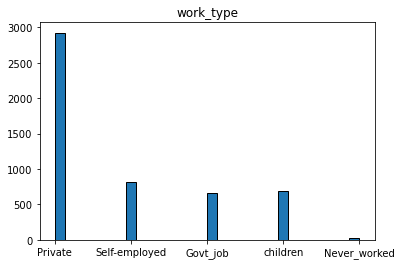

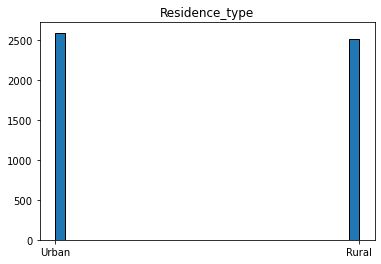

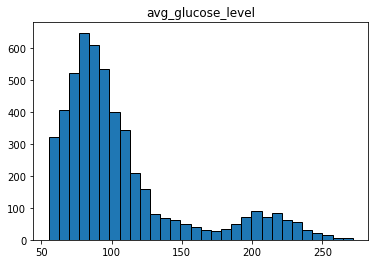

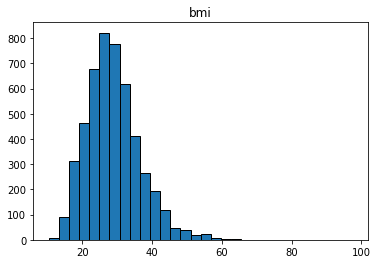

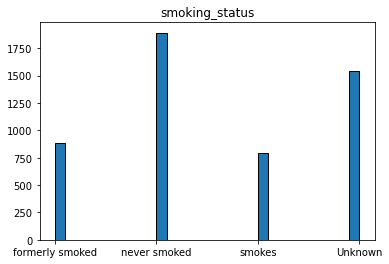

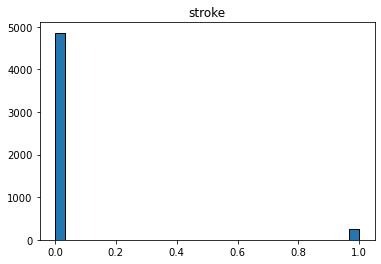

In [778]:
import matplotlib.pyplot as plt

for column in data.columns:
    if data[column].dtype.name != 'category':
        plt.hist(data[column], bins=30, edgecolor='black')
        plt.title(column)
        plt.show()

# Data Preparation


## Convert to category
- Among our predictors, we have 3 numerical features; age, avg_glucose_level, bmi. The remaining features along with the label are categorical and should be converted to category datatype, as done below.

In [779]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
num_cols = ['age', 'avg_glucose_level', 'bmi']
data[cat_cols] = data[cat_cols].astype('category')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Showing all data types

In [780]:
for column in data.columns:
        print(column,": ")
        print(data[column].value_counts())
        print()

id : 
49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64

gender : 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

age : 
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

hypertension : 
0    4612
1     498
Name: hypertension, dtype: int64

heart_disease : 
0    4834
1     276
Name: heart_disease, dtype: int64

ever_married : 
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type : 
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type : 
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

avg_glucose_level : 
93.88     6
72.49     5
84.10     5
91.68     5
83.16     5
         ..
95.02     1
120.09 

## Drop some columns which is not relevent like id

In [781]:
fields_to_drop = ['id',]
data = data.drop(fields_to_drop, axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Check the empty rows 

<AxesSubplot:>

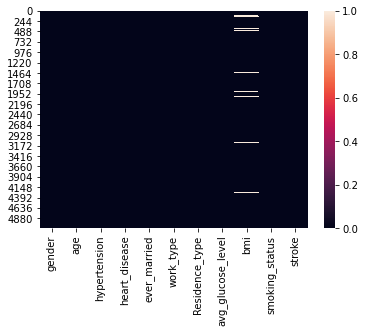

In [782]:
import seaborn as sb

sb.heatmap(data.isnull())

## Remove the rows that contains empty cell

<AxesSubplot:>

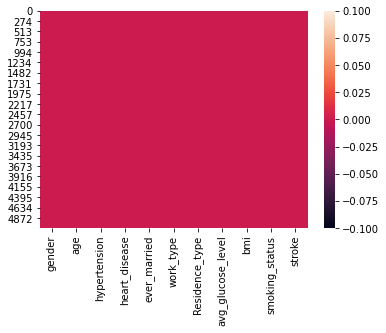

In [783]:
data = data.dropna()
sb.heatmap(data.isnull())

## One-Hot Encoded
- We need to one-hot encode our categorical columns, except the binary ones. The columns with binary string data will be label encoded.

In [784]:
from sklearn.preprocessing import LabelEncoder


mod_data = data.copy()

mod_data['gender'] = LabelEncoder().fit_transform(data['gender'])
mod_data['ever_married'] = LabelEncoder().fit_transform(data['ever_married'])
mod_data['Residence_type'] = LabelEncoder().fit_transform(data['Residence_type'])


encdf = pd.get_dummies( data[['work_type', 'smoking_status']] )
mod_data.drop(['work_type', 'smoking_status'], axis=1, inplace=True)
mod_data = mod_data.join(encdf)
mod_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0


# Model Tranining & Tuning


## Spliting the dataset into 80/20 train test split

In [785]:
from sklearn.model_selection import train_test_split

# add stroke data into y 
y = mod_data.pop('stroke')

# now add the rest of data in x and already removed y in perv step
X = mod_data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(y)


0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: category
Categories (2, int64): [0, 1]


## Add Models

##  1.1 Add Decision Tree Model 
- Train the model and show the accuracy 

1.0
1.0
1.0


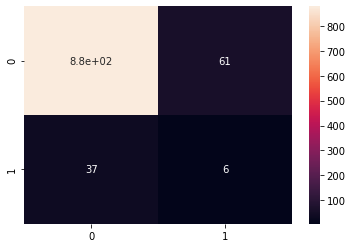

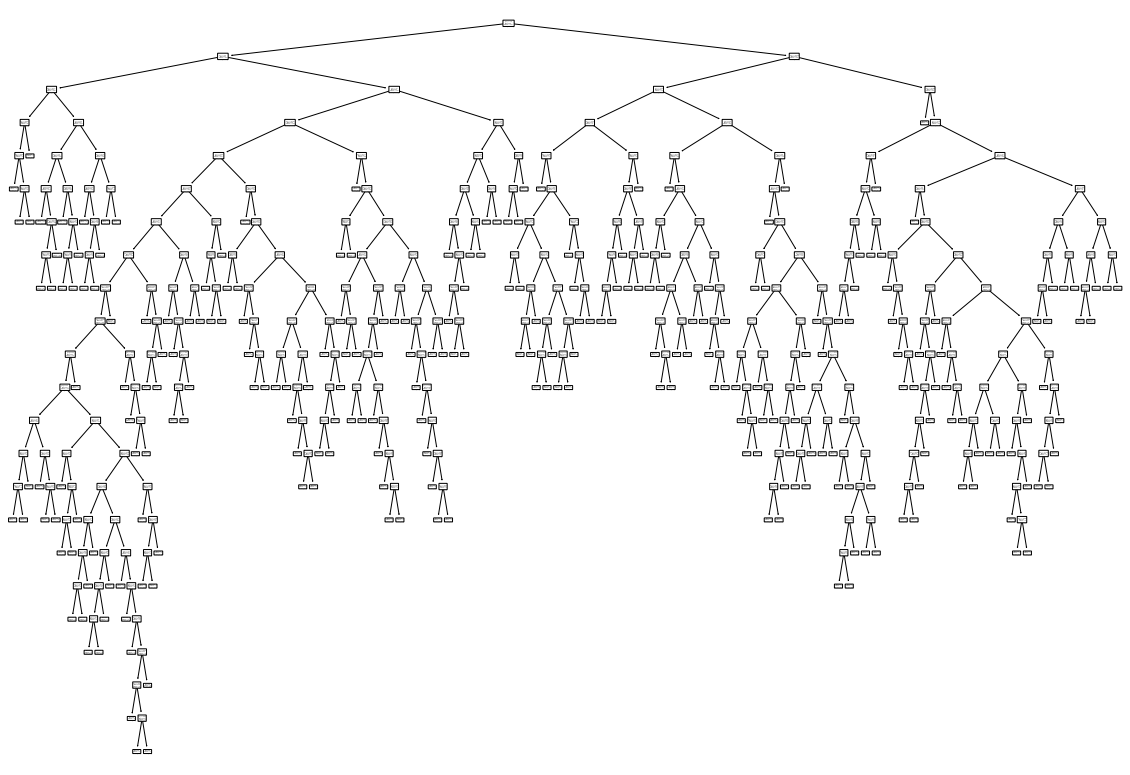

In [786]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score ,confusion_matrix
from sklearn import tree


dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)


print(accuracy_score(y_train, dtree.predict(X_train)))
print(f1_score(y_train, dtree.predict(X_train)))
print(roc_auc_score(y_train, dtree.predict(X_train)))

dtree_predict = dtree.predict(X_test)
dtree_cm = confusion_matrix(y_test, dtree_predict)
sns.heatmap(dtree_cm,annot=True)


plt.figure(figsize = (20,14))
tree.plot_tree(dtree, rounded=True)
plt.show()


## 1.2 Decision Tree Hyperparameter Tuning
- will be using GridSearchCV 


In [787]:
from sklearn.model_selection import GridSearchCV

dtparam = {"max_depth":[3,5,10,None], 'max_features':['auto',8,16,None]}
dtcv = GridSearchCV(dtree, param_grid=dtparam, cv=10, scoring=['f1','accuracy'], refit='f1')
dtcv.fit(X_train,y_train)

print(dtcv.best_estimator_)
print(dtcv.best_score_)
print(dtcv.cv_results_['mean_test_accuracy'][dtcv.best_index_])

DecisionTreeClassifier(max_depth=10, max_features=8, random_state=0)
0.1453852166352166
0.9371053383185336


## 1.3 Decision Tree Learning Curve

## 1.4 Decision Tree Complexity Curve

## 2.1 Add Logistic Regression Model 
- Train the model and show the accuracy 

0.957983193277311
0.011976047904191616
0.5030120481927711


<AxesSubplot:>

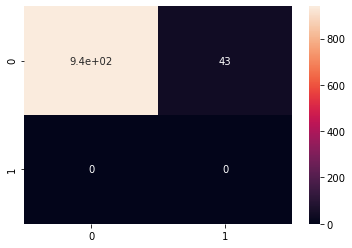

In [788]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

lg = LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=5000)
lg.fit(X_train,y_train)

print(accuracy_score(y_train, lg.predict(X_train)))
print(f1_score(y_train, lg.predict(X_train)))
print(roc_auc_score(y_train, lg.predict(X_train)))

lg_predict = lg.predict(X_test)
lg_cm = confusion_matrix(lg_predict,y_test)
sns.heatmap(lg_cm,annot=True)

## 2.2 Logistic Regression Hyperparameter Tuning
- will be using GridSearchCV 


In [789]:
from sklearn.model_selection import GridSearchCV



#lgparam = {"max_depth":[3,5,10,None], 'max_features':['auto',8,16,None]}
#lgcv = GridSearchCV(lg, param_grid=lgparam, cv=10, scoring=['f1','accuracy'], refit='f1')
#lgcv.fit(X_train,y_train)

#print(lgcv.best_estimator_)
#print(lgcv.best_score_)
#print(lgcv.cv_results_['mean_test_accuracy'][lgcv.best_index_])


## 2.3 Logistic Regression Learning Curve

## 2.4 Logistic Regression Complexity Curve


##  3.1 Add k-Nearest Neighbours Model 
- Train the model and show the accuracy

0.9597657244716068
0.11235955056179775
0.5298545951954589


<AxesSubplot:>

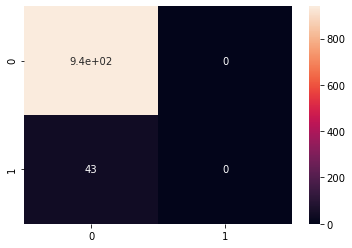

In [790]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train,y_train)

print(accuracy_score(y_train, kn.predict(X_train)))
print(f1_score(y_train, kn.predict(X_train)))
print(roc_auc_score(y_train, kn.predict(X_train)))

kn_predict = kn.predict(X_test)
kn_cm = confusion_matrix(y_test,kn_predict)
sns.heatmap(kn_cm,annot=True)



## 3.2  k-Nearest Neighbours Hyperparameter Tuning
- will be using GridSearchCV 

## 3.3 k-Nearest Neighbours Learning Curve

## 3.4 k-Nearest Neighbours Complexity Curve

##  4.1 Add Suport Vector Machine Model 
- Train the model and show the accuracy

0.95772854596384
0.0
0.5


<AxesSubplot:>

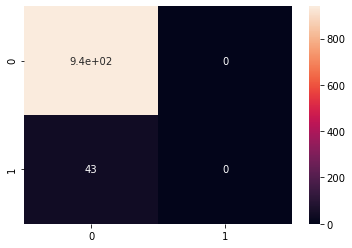

In [791]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(accuracy_score(y_train, svm.predict(X_train)))
print(f1_score(y_train, svm.predict(X_train)))
print(roc_auc_score(y_train, svm.predict(X_train)))

svm_predict = svm.predict(X_test)
svm_cm = confusion_matrix(y_test,svm_predict)
sns.heatmap(svm_cm,annot=True)

## 4.2 Suport Vector Machine Hyperparameter Tuning
- will be using GridSearchCV 

## 4.3 Suport Vector Machine Learning Curve

## 4.4 Suport Vector Machine Complexity Curve

##  5.1 Add  Naive Bayes machine Model 
- Train the model and show the accuracy

0.5749936338171632
0.14803471158754467
0.7176563205761093


<AxesSubplot:>

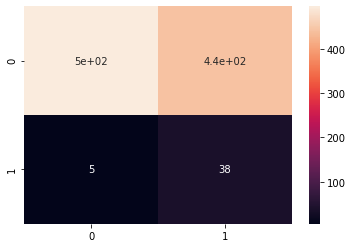

In [792]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

print(accuracy_score(y_train, nb.predict(X_train)))
print(f1_score(y_train, nb.predict(X_train)))
print(roc_auc_score(y_train, nb.predict(X_train)))

nb_predict = nb.predict(X_test)
sns.heatmap(confusion_matrix(y_test,nb_predict),annot=True)

## 5.2  Naive Bayes Hyperparameter Tuning
- will be using GridSearchCV 

## 5.3 Naive Bayes Machine Learning Curve

## 5.4 Naive Bayes Machine Complexity Curve